# GRIP MAY 21 Batch- Data Science and Business Analytics Internship


Task1 - **Prediction Using Supervised Learning**

 Algorithm used is **Simple Linear Regression**

Analysis done by **JOSE BABY**

IDE - **R** 

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Step 1: Importing the Dataset**

In [2]:
data = read.table(file.choose(),sep = ',', header = TRUE)

In [3]:
head(data)

Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20


**Step 2: Now to check for the relation between the dependent and the independent variable, I have plot the two variables** 

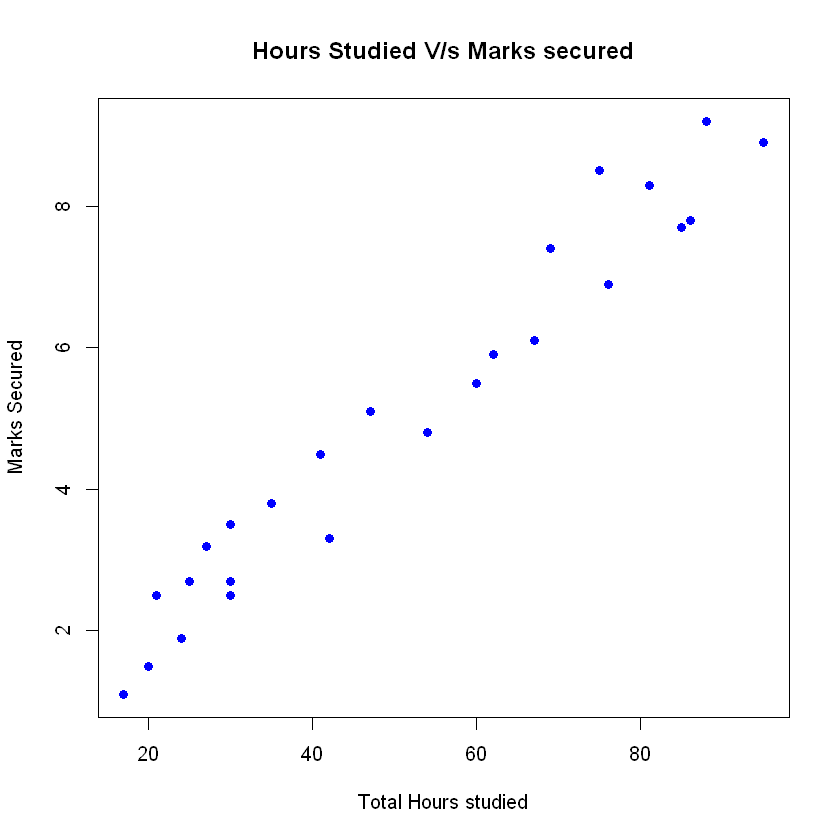

In [267]:
plot(data$Scores,data$Hours,xlab = "Total Hours studied",
     ylab = "Marks Secured",col = 'blue',cex = 1,main = "Hours Studied V/s Marks secured",pch = 19)

**Interpretation :**
From the scatterplot it has been observed that there is a linear and positive relation between the two variables.

**Step 3: Checking for the degree of relation between the two variable using Karl Pearsons correlation Coefficient**

In [246]:
cor.test(data$Hours,data$Scores)


	Pearson's product-moment correlation

data:  data$Hours and data$Scores
t = 21.583, df = 23, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9459248 0.9896072
sample estimates:
      cor 
0.9761907 


**Interpretation :** From the Correlation coefficient which is 0.9762, it can be concluded that there is a high positive linear relationship between the two variables. 

**Step 4: Splitting the dataset into train(80%) and test(20%) data**

In [247]:
require(caTools)
set.seed(101) 
sample = sample.split(data$Scores, SplitRatio = .75)
train = subset(data, sample == TRUE)
test  = subset(data, sample == FALSE)

**Step 5: Now building the model using the train dataset** 

In [248]:
model1 = lm(Scores~Hours, data = train)
summary(model1)


Call:
lm(formula = Scores ~ Hours, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7371 -4.2040  0.3126  3.5320  7.4894 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.8465     2.6634   1.069    0.301    
Hours         9.5165     0.4651  20.460 6.74e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.202 on 16 degrees of freedom
Multiple R-squared:  0.9632,	Adjusted R-squared:  0.9609 
F-statistic: 418.6 on 1 and 16 DF,  p-value: 6.735e-13


**Interpretation :** Now checking for the overall significance of the model, we have found that the p value is less than 0.05, Thus,we reject our null hypothesis and the model is **highly significant**.Also, the R square value is 0.9632, which means the independent variable (Number of hours studied) explains **96.32%** of variation in the dependent variable(Scores).
Thus, the model Obtained is:
     
   **Y = 2.8465 + 9.5165*X1**
   
That means with an increase in one unit of the indepedent variable(No. of Hours studied) there is an increase of 9.5165 units in the dependent variable Y(Scores).


**Step 6: Using the above obtained Model, we try to predict the independent variables of the Train Dataset**

In [249]:
train$predicted = predict(model1)
train

,Hours,Scores,predicted
1,2.5,21,26.63783
2,5.1,47,51.38083
4,8.5,75,83.73707
5,3.5,30,36.15437
6,1.5,20,17.12129
7,9.2,88,90.39864
8,5.5,60,55.18745
9,8.3,81,81.83376
10,2.7,25,28.54114
12,5.9,62,58.99406


**Step 7:  Plotting the Independent Variable v/s the observered Y and the Predicted Y^**

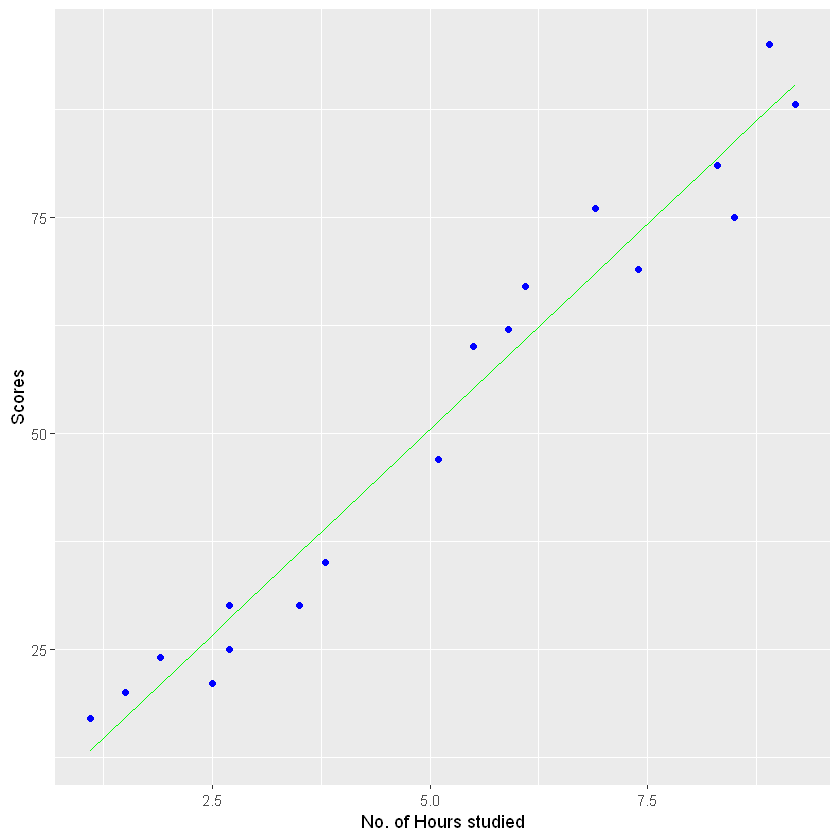

In [250]:
require(ggplot2)
g = ggplot(train,aes(Hours))+
geom_point(aes(y = Scores),colour = "blue")+
geom_line(aes(y = predicted),colour = "green")
g = g + ylab("Scores") + xlab("No. of Hours studied")
g

**Step 8: Checking for Outliers**

In [264]:
#standardized Residuals
train$stdResiduals=rstandard(model1)
train

,Hours,Scores,predicted,stdResiduals
1,2.5,21,26.63783,-1.1480117
2,5.1,47,51.38083,-0.8664960
4,8.5,75,83.73707,-1.8203898
5,3.5,30,36.15437,-1.2304102
6,1.5,20,17.12129,0.6030998
7,9.2,88,90.39864,-0.5126179
8,5.5,60,55.18745,0.9525864
9,8.3,81,81.83376,-0.1726433
10,2.7,25,28.54114,-0.7178783
12,5.9,62,58.99406,0.5962366


**Interpretation:** Since all of the residuals lie between the interval (-3,3), no transformation or removal of records is required.

**Step 9: Checking for the normality assumption**

In [265]:
errors = train$Scores - train$predicted
shapiro.test(errors)


	Shapiro-Wilk normality test

data:  errors
W = 0.93979, p-value = 0.2874


**Interpretation :**
Since the p value obtained is greater than 0.05, we accept our null hypothesis(i.e) The errors follow normality.Thus, using Linear Regression is justified

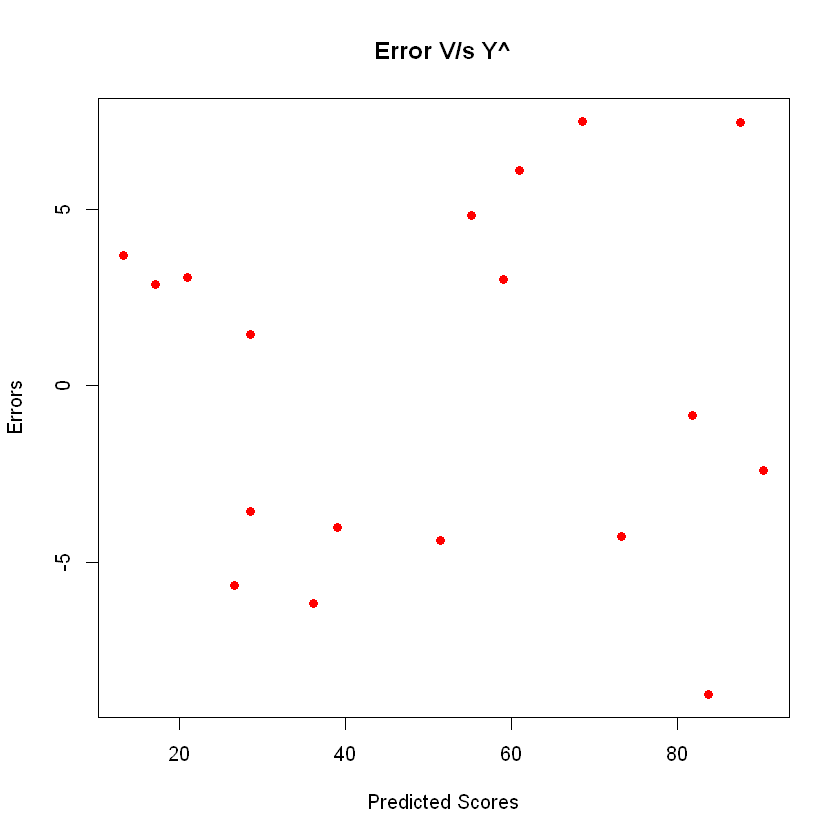

In [266]:
plot(train$predicted,errors,main= 'Error V/s Y^',xlab = 'Predicted Scores', ylab = 'Errors', col = "Red", pch = 19 )

**Interpretation:** Since we have obtained a random pattern between the Error and the Predicted Y^, it is concluded that no normality assumptions have been violated. 

**Step 10: Now predicting the scores for our test dataset using the model.**

In [271]:
Prediction_test = predict(model1,test)

In [272]:
test = data.frame(test,Prediction_test)

In [273]:
test

,Hours,Scores,Prediction_test
3,3.2,27,33.29941
11,7.7,85,76.12383
13,4.5,41,45.67091
14,3.3,42,34.25106
17,2.5,30,26.63783
22,4.8,54,48.52587
25,7.8,86,77.07549


**Step 11: Evaluating the Model**

In [240]:
mae = sum(abs(test$Scores - test$Prediction_test))/length(test$Prediction_test)
mae

[1] 6.479462

**Interpretation:** Thus, the Mean squared Error obtained is 6.4794

**Step 12: Finally, using the model, we predict the score when the student is studying for 9.25hrs**

In [260]:
Hours = c(9.25)
new_data = data.frame(Hours)
new_data$predicted_score = predict(model1,new_data)

In [261]:
new_data

Hours,predicted_score
9.25,90.87447


**Interpretation:** It has been predicted that if a student studies for 9.25hrs, he/she will secore a score of **90.874**.

**END**